In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import sklearn
import keras
import torch
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [209]:
df = pd.read_csv('synthetic_data.csv')
#pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])

df

KeyError: "['Id'] not found in axis"

In [ ]:
df

In [ ]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 0
    else:
        return 1

In [ ]:
Output = df.apply(pin_update, axis=1)
df['Output'] = Output
df

,Unnamed: 0,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,...,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score A,Total Row Score B,Total Row Score C,Output
0,0,8,12.0,0.0,3.0,0.0,6.0,4.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,29.0,17.0,8.0,1
1,1,18,12.0,0.0,2.0,1.0,6.0,4.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,30.0,14.0,2.0,0
2,3,9,9.0,0.0,0.0,0.0,6.0,4.0,2.0,1.0,...,8.0,0.0,0.0,0.0,0.0,0.0,26.0,16.0,12.0,1
3,4,16,0.0,1.0,0.0,0.0,8.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18.0,15.0,0.0,0
4,5,6,12.0,0.0,3.0,0.0,6.0,4.0,2.0,1.0,...,2.0,1.0,0.0,0.0,0.0,0.0,32.0,28.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15795,24991,10,9.0,1.0,2.0,0.0,6.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,25.0,16.0,9.0,1
15796,24992,43,12.0,0.0,3.0,0.0,8.0,3.0,2.0,0.0,...,2.0,3.0,0.0,0.0,0.0,0.0,28.0,28.0,5.0,0
15797,24993,35,12.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,22.0,17.0,5.0,0
15798,24996,18,12.0,1.0,3.0,0.0,6.0,4.0,0.0,1.0,...,8.0,2.0,0.0,0.0,0.0,0.0,31.0,17.0,15.0,1


In [ ]:
df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Pan 1',
          'Total Row Score A', 
          'Anteroposterior 1.1',
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Pan 1.1',
          'Total Row Score B',
          'Output']]

df1.shape

(15800, 17)

In [ ]:
df1.iloc[1:, :]

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Pan 1,Total Row Score A,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Pan 1.1,Total Row Score B,Output
1,12.0,0.0,2.0,1.0,6.0,0.0,0.0,30.0,3.0,0.0,1.0,0.0,6.0,2.0,0.0,14.0,0
2,9.0,0.0,0.0,0.0,6.0,2.0,0.0,26.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,16.0,1
3,0.0,1.0,0.0,0.0,8.0,0.0,0.0,18.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,15.0,0
4,12.0,0.0,3.0,0.0,6.0,2.0,0.0,32.0,9.0,0.0,3.0,1.0,6.0,0.0,0.0,28.0,1
5,12.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,15.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15795,9.0,1.0,2.0,0.0,6.0,0.0,0.0,25.0,9.0,3.0,1.0,0.0,0.0,0.0,0.0,16.0,1
15796,12.0,0.0,3.0,0.0,8.0,2.0,0.0,28.0,3.0,0.0,2.0,0.0,6.0,4.0,0.0,28.0,0
15797,12.0,1.0,0.0,0.0,6.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,17.0,0
15798,12.0,1.0,3.0,0.0,6.0,0.0,0.0,31.0,3.0,0.0,1.0,0.0,6.0,0.0,0.0,17.0,1


In [ ]:
x = np.array([df["Anteroposterior 1"], df["Anteroposterior 2"],df["Vertical 1"],df["Vertical 2"],df["Total Row Score A"],df["Total Row Score B"]]).T

y = np.array(df["Total Row Score C"]).T


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)


In [ ]:
target_column = "Output"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state=0)


In [ ]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))


X_train: (11850, 36)
y_train: (11850,)
X_test: (3950, 36)
y_test: (3950,)


In [ ]:
basic_model = Sequential()
basic_model.add(Dense(units=16, activation='relu', input_shape=(36,)))
basic_model.add(Dense(2, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(11850, 36)
(11850,)
(3950, 36)
(3950,)


In [ ]:
predicted = basic_model.predict(X_test)

124/124 [==============================] - 0s 2ms/step


In [ ]:
# predicted = tf.squeeze(predicted)
# predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
# actual = np.array(y_test)
# conf_mat = confusion_matrix(actual, predicted)
# displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
# displ.plot()


# Kun A-værdier! 

In [ ]:
target_column = "Output"
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67805/3048013620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df1)
t_df1 = scaler.transform(df1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)

In [ ]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(11850, 16)
(11850,)
(3950, 16)
(3950,)


In [ ]:
basic_model = Sequential()
basic_model.add(Dense(units=32, activation='relu', input_shape=(16,)))
basic_model.add(Dense(16, activation='relu'))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.01)



In [ ]:
# earlystop = keras.callbacks.EarlyStopping(monitor='val_acc', patience=20, mode='max')
# basic_model = Sequential()
# basic_model.add(Dense(1012, input_dim=9, activation = 'relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(512, activation='relu'))
# basic_model.add(Dropout(0.9))
# basic_model.add(Dense(128, activation='relu'))
# basic_model.add(Dropout(0.5))
# basic_model.add(Dense(32, activation='relu'))
# basic_model.add(Dense(1, activation='sigmoid'))
# adam_opt = tf.keras.optimizers.legacy.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# basic_model.compile(loss='binary_crossentropy', optimizer=adam_opt, metrics=['accuracy'])


In [ ]:
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
basic_model.fit(X_train1, y_train1, epochs=1)


2024-03-08 16:32:49.216377: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


371/371 [==============================] - 8s 14ms/step - loss: 0.6273 - accuracy: 0.6690


In [ ]:
loss_and_metrics1 = basic_model.evaluate(X_test1, y_test1)
print(loss_and_metrics1)
print('Loss = ',loss_and_metrics1[0])
print('Accuracy = ',loss_and_metrics1[1])

124/124 [==============================] - 3s 13ms/step - loss: 0.6429 - accuracy: 0.6504
[0.6428528428077698, 0.6503797173500061]
Loss =  0.6428528428077698
Accuracy =  0.6503797173500061


In [ ]:
pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
X_train1, X_test1, y_train1, y_test1 = train_test_split(t_df1, output_rows, test_size=0.25, random_state=0)



In [ ]:
predicted = basic_model.predict(X_test1)

124/124 [==============================] - 0s 2ms/step


tf.Tensor([0.5033501  0.59254545 0.6003849  ... 0.5246093  0.6311633  0.57635003], shape=(3950,), dtype=float32)


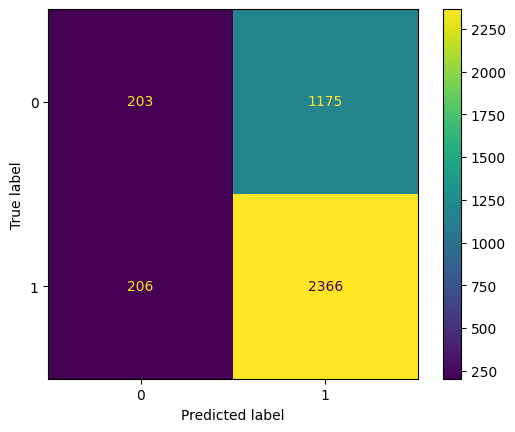

In [ ]:
predicted = tf.squeeze(predicted)
print(predicted)
predicted = np.array([0 if x <= 0.5 else 1 for x in predicted])
actual = np.array(y_test1)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [ ]:
def total_row_score(vector):
    vector[7] = sum(vector[0:7])
    vector[15] = sum(vector[8:15])
    print(vector)

In [ ]:
"Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Spacing','Pan 1','Total Row Score A','Goslon Score A'

          
'Anteroposterior 1.1','Anteroposterior 2.1','Vertical 1.1', 'Vertical 2.1', 'Transverse.1', 'Spacing.1', 'Pan 1.1', 'Total Row Score B', 'Goslon Score B'



xnew = np.array([12,0,2,6,1,0,6,0,  
                 12,0,2,6,1,0,6, 0])


total_row_score(xnew)

xnew.shape


[12  0  2  6  1  0  6 27 12  0  2  6  1  0  6 27]


(16,)

In [ ]:
prediction = basic_model.predict(xnew.reshape(1,16))
predicted = tf.squeeze(prediction)
print(predicted)
predicted = np.array([0 if predicted <= 0.5 else 1 ])
predicted

1/1 [==============================] - 0s 197ms/step
tf.Tensor(0.99999607, shape=(), dtype=float32)


array([1])

In [ ]:
from ctgan import CTGAN

In [ ]:
categoricals = ["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          'Pan 1',
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 1.1',
          'Total Row Score B',]

ctgan = CTGAN(epochs=10)
ctgan.fit(df1, categoricals)

synthetic_iris = ctgan.sample(20000)
synthetic_iris.head()

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Pan 1,Total Row Score A,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Pan 1.1,Total Row Score B
0,12.0,0.0,0.0,0.0,6.0,0.0,0.0,30.0,12.0,0.0,0.0,0.0,6.0,3.0,0.0,8.0
1,9.0,0.0,2.0,0.0,6.0,3.0,0.0,24.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,23.0
2,9.0,0.0,0.0,0.0,6.0,0.0,0.0,26.0,9.0,0.0,0.0,3.0,8.0,3.0,0.0,18.0
3,12.0,1.0,1.0,0.0,2.0,0.0,0.0,18.0,0.0,1.0,3.0,0.0,6.0,0.0,0.0,15.0
4,12.0,0.0,0.0,0.0,1.0,0.0,0.0,28.0,9.0,0.0,3.0,4.0,8.0,0.0,0.0,18.0


# test 


In [ ]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 1
    else:
        return 0

In [ ]:
def pin_update1(row):
     if 5 < row["Total Row Score C"] <= 16:
          return 1
     else:
          return 0 

In [210]:
df_syn = pd.read_csv('synthetic_data.csv')
Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
#Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
#df_syn['Output2']  = Output2
df_syn
df1_syn = df_syn[["Anteroposterior 1",
          'Vertical 2',
          'Transverse',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Vertical 1.1',
          'Transverse.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1']]
df1_syn.iloc[1:, :]

target_column = ["Output","Output1"]
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)


X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.4,shuffle=True)

X_train_syn = np.array(X_train_syn)
X_test_syn = np.array(X_test_syn)
y_train_syn = np.array(y_train_syn)
y_test_syn = np.array(y_test_syn)


/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67805/855936983.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_syn.drop(target_column,axis=1,inplace=True)


In [214]:
df1_syn.shape

(17810, 12)

In [211]:
from tensorflow.keras.optimizers.legacy import Adam
import torch


In [216]:
no_classes= 3
no_epochs = 10 
optimizer = Adam()
verbosity = 1
num_folds = 5
batch_size = 32
acc_per_fold = []
loss_per_fold = []
fold_no = 1

In [217]:
model = Sequential()
model.add(Dense(256, input_dim=12, activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(32,activation='relu'))
    #model.add(Dropout(0.4))
model.add(Dense(16,activation='relu'))
    #model.add(Dropout(0.4))
model.add(Dense(8,activation='relu'))
    #model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
 # Compile model
model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

model.fit(X_train_syn, y_train_syn, batch_size=batch_size,epochs=no_epochs, verbose=verbosity)

Epoch 1/10
334/334 [==============================] - 29s 74ms/step - loss: 0.8029 - accuracy: 0.4985
Epoch 2/10
334/334 [==============================] - 22s 67ms/step - loss: 0.8157 - accuracy: 0.4937
Epoch 3/10
334/334 [==============================] - 22s 65ms/step - loss: 3.3877 - accuracy: 0.4996
Epoch 4/10
334/334 [==============================] - 22s 66ms/step - loss: 12.4158 - accuracy: 0.4973
Epoch 5/10
334/334 [==============================] - 22s 65ms/step - loss: 39.5744 - accuracy: 0.5107
Epoch 6/10
334/334 [==============================] - 21s 63ms/step - loss: 78.3611 - accuracy: 0.5010
Epoch 7/10
334/334 [==============================] - 21s 64ms/step - loss: 214.5922 - accuracy: 0.4973
Epoch 8/10
334/334 [==============================] - 21s 64ms/step - loss: 456.9373 - accuracy: 0.4984
Epoch 9/10
334/334 [==============================] - 22s 67ms/step - loss: 789.7855 - accuracy: 0.5042
Epoch 10/10
334/334 [==============================] - 22s 67ms/step - lo

In [ ]:
model.evaluate(X_test_syn,y_test_syn, verbose=1)

189/189 [==============================] - 12s 61ms/step - loss: 0.5937 - accuracy: 0.6367


[0.5936639904975891, 0.6367096900939941]

In [ ]:
predicted = model.predict(X_test_syn)

189/189 [==============================] - 1s 2ms/step


tf.Tensor(
[[0.22870965 0.77129036]
 [0.2242299  0.77577007]
 [0.29021263 0.70978737]
 ...
 [0.16701551 0.8329845 ]
 [0.19734585 0.8026541 ]
 [0.20379014 0.79620993]], shape=(6042, 2), dtype=float32)


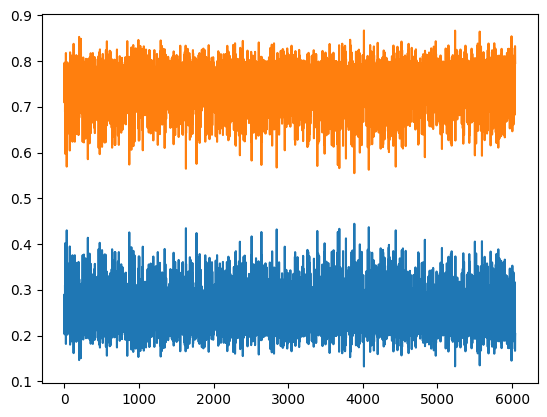

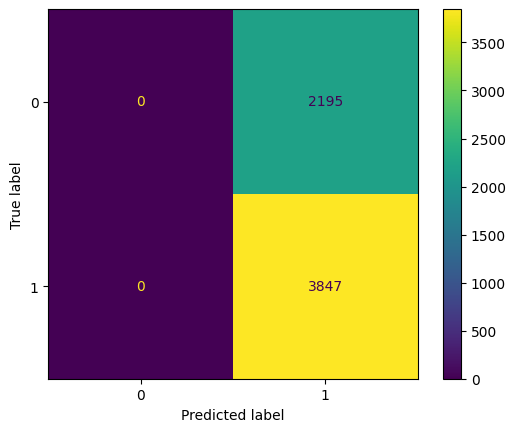

In [ ]:
predict = tf.squeeze(predicted)
plt.plot(predict)
print(predict)
predic= np.array([np.argmax(row) for row in predicted])
actual = np.array([np.argmax(row) for row in y_test_syn])
conf_mat = confusion_matrix(actual, predic)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [218]:
from sklearn import svm 

In [225]:
y_train

2862     1
10965    1
15512    1
7        1
9165     1
        ..
13123    0
3264     1
9845     1
10799    1
2732     0
Name: Output, Length: 11850, dtype: int64

In [230]:
clf = svm.NuSVC(gamma="auto")
clf.fit(X_train, y_train)

NuSVC(gamma='auto')